<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

Printing the files' names in its "recommender_social_graph" directory:

In [7]:
import sys
print(sys.path)

['d:\\VS Code\\complex-systems-social-graph\\recommender_social_graph\\content\\notebook', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38', '', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\Pythonwin', '.', '../../']


Importing mandatory methods for the notebook:

In [8]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
sys.path.append('.')
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from metrics import polarisation, sarle_bimodality, disagreement
from content.metrics import feed_entropy, feed_satisfaction, feed_satisfaction_weight
from content.content_recommender import simulate_epoch_content_recommender

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0           -0.201
           1           -0.308
           2           -0.697
           3           -0.358
           4            0.854
           5           -0.237
           6           -0.33
           7           -0.528
           8            0.835
           9           -0.359
          10            0.086
          11            0.865
          12           -0.384
          13           -0.155
          14            0.785
          15            0.958
          16           -0.224
          17           -0.948
          18            0.209
          19           -0.458
          20           -0.024
          21            0.725
          22           -0.242
          23            0.076
          24            0.123
          25           -0.522
          26           -0.447
          27           -0.35
          28            0.45
          29            0.213
          30           -0.

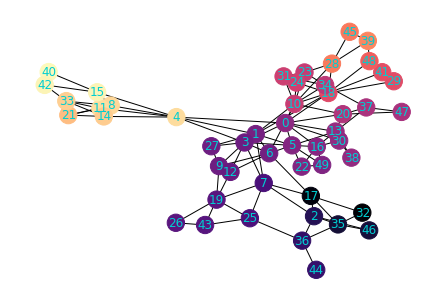

In [9]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating an epoch with ABEBA model (with no Recommender):

  node label    opinion value
------------  ---------------
           0           -0.214
           1           -0.312
           2           -0.697
           3           -0.358
           4            0.854
           5           -0.277
           6           -0.312
           7           -0.528
           8            0.804
           9           -0.359
          10            0.086
          11            0.895
          12           -0.384
          13           -0.155
          14            0.784
          15            0.958
          16           -0.224
          17           -0.917
          18            0.232
          19           -0.433
          20           -0.024
          21            0.762
          22           -0.276
          23            0.082
          24            0.123
          25           -0.522
          26           -0.462
          27           -0.35
          28            0.472
          29            0.213
          30           -0.165
          3

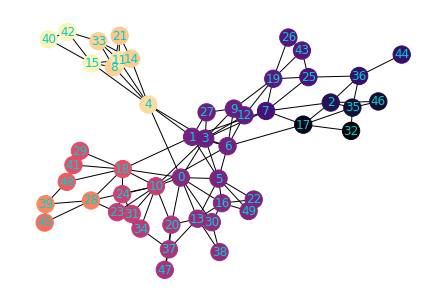

In [10]:
# Simulating an epoch and printing the opinion graph obtained
G = simulate_epoch_updated(G, 50, 50)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0            0.263
           1            0.798
           2            0.821
           3           -0.657
           4           -0.966
           5            0.769
           6           -0.323
           7           -0.624
           8            0.021
           9           -0.955
          10            0.008
          11            0.924
          12            0.074
          13           -0.75
          14           -0.612
          15           -0.664
          16           -0.692
          17           -0.071
          18            0.626
          19            0.643
          20           -0.402
          21            0.154
          22           -0.863
          23           -0.677
          24            0.791
          25            0.765
          26           -0.209
          27            0.408
          28            0.139
          29            0.671
          30           -

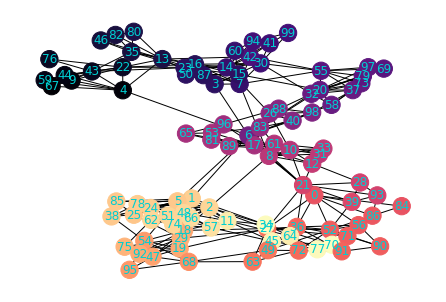

In [11]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(100, [1], avg_friend = 5, hp_alpha=5, hp_beta=0.0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

Epoch	Random	Normal	Nudge	Nudge Var
Starting Nodes:
  node label    opinion value
------------  ---------------
           0            0.263
           1            0.798
           2            0.821
           3           -0.657
           4           -0.966
           5            0.769
           6           -0.323
           7           -0.624
           8            0.021
           9           -0.955
          10            0.008
          11            0.924
          12            0.074
          13           -0.75
          14           -0.612
          15           -0.664
          16           -0.692
          17           -0.071
          18            0.626
          19            0.643
          20           -0.402
          21            0.154
          22           -0.863
          23           -0.677
          24            0.791
          25            0.765
          26           -0.209
          27            0.408
          28            0.139
          29       

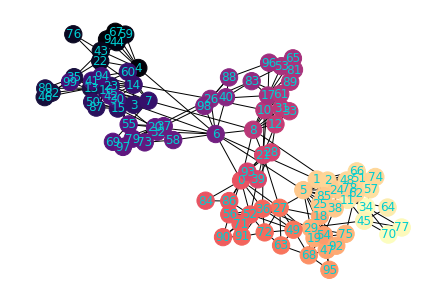

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.244
           1            0.28
           2            0.386
           3           -0.249
           4           -0.265
           5            0.36
           6           -0.124
           7           -0.261
           8            0.104
           9           -0.265
          10            0.049
          11            0.377
          12            0.104
          13           -0.261
          14           -0.232
          15           -0.257
          16           -0.26
          17            0.023
          18            0.352
          19            0.417
          20           -0.171
          21            0.222
          22           -0.265
          23           -0.262
          24            0.359
          25            0.346
          26           -0.074
          27            0.396
          28            0.179
          29            0.425
          30         

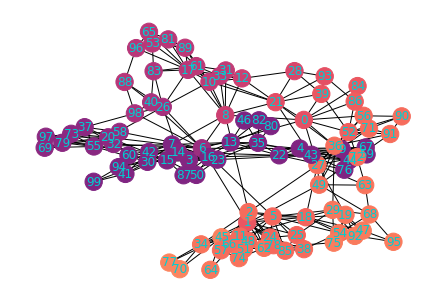

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.161
           1            0.008
           2           -0.227
           3           -0.211
           4            0.029
           5            0.016
           6           -0.049
           7           -0.254
           8           -0.139
           9            0.202
          10            0.257
          11            0.091
          12            0.128
          13            0.295
          14            0.077
          15           -0.12
          16           -0.049
          17           -0.051
          18            0.093
          19           -0.116
          20            0.221
          21            0.155
          22            0.262
          23            0.165
          24            0.139
          25            0.303
          26           -0.005
          27           -0.239
          28            0.083
          29            0.092
          30   

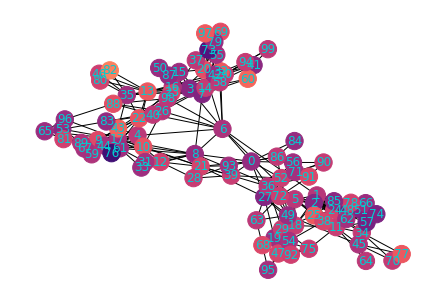

Normal Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.505
           1            0.507
           2            0.55
           3            0.461
           4            0.516
           5            0.531
           6            0.501
           7            0.491
           8            0.527
           9            0.498
          10            0.497
          11            0.506
          12            0.528
          13            0.493
          14            0.477
          15            0.556
          16            0.481
          17            0.514
          18            0.475
          19            0.507
          20            0.494
          21            0.519
          22            0.495
          23            0.487
          24            0.491
          25            0.524
          26            0.491
          27            0.501
          28            0.515
          29            0.523
          30   

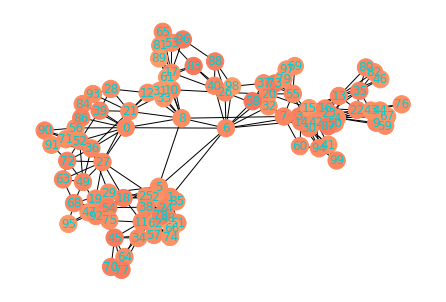

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0              0.5
           1              0.5
           2              0.5
           3              0.5
           4              0.5
           5              0.5
           6              0.5
           7              0.5
           8              0.5
           9              0.5
          10              0.5
          11              0.5
          12              0.5
          13              0.5
          14              0.5
          15              0.5
          16              0.5
          17              0.5
          18              0.5
          19              0.5
          20              0.5
          21              0.5
          22              0.5
          23              0.5
          24              0.5
          25              0.5
          26              0.5
          27              0.5
          28              0.5
          29              0.5
          30   

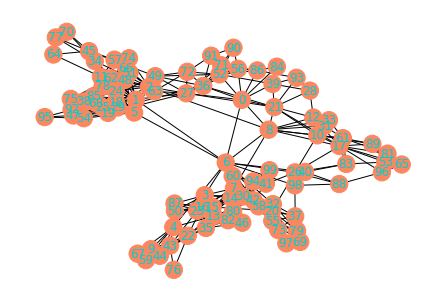

Nudge Opt Recommender Nodes:
  node label    opinion value
------------  ---------------
           0              0.5
           1              0.5
           2              0.5
           3              0.5
           4              0.5
           5              0.5
           6              0.5
           7              0.5
           8              0.5
           9              0.5
          10              0.5
          11              0.5
          12              0.5
          13              0.5
          14              0.5
          15              0.5
          16              0.5
          17              0.5
          18              0.5
          19              0.5
          20              0.5
          21              0.5
          22              0.5
          23              0.5
          24              0.5
          25              0.5
          26              0.5
          27              0.5
          28              0.5
          29              0.5
          3

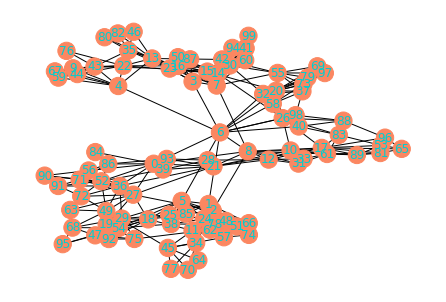

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.39
           1            0.526
           2            0.522
           3           -0.466
           4           -0.456
           5            0.525
           6           -0.347
           7           -0.458
           8            0.257
           9           -0.456
          10            0.257
          11            0.521
          12            0.262
          13           -0.47
          14           -0.461
          15           -0.465
          16           -0.463
          17            0.234
          18            0.528
          19            0.528
          20           -0.346
          21            0.283
          22           -0.462
          23           -0.466
          24            0.527
          25            0.531
          26           -0.128
          27            0.465
          28            0.308
          29            0.509
          30   

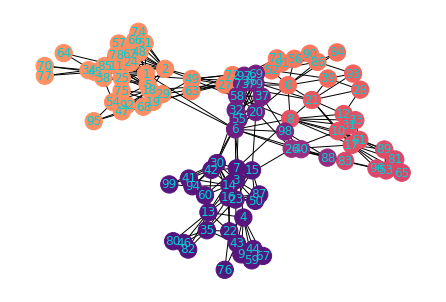

Unsimilar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.184
           1            0.224
           2            0.217
           3           -0.053
           4           -0.117
           5            0.21
           6            0.081
           7           -0.096
           8            0.069
           9           -0.26
          10            0.113
          11            0.348
          12            0.195
          13           -0.131
          14           -0.143
          15           -0.125
          16           -0.098
          17            0.086
          18            0.393
          19            0.397
          20           -0.056
          21            0.208
          22           -0.118
          23           -0.115
          24            0.249
          25            0.261
          26           -0
          27            0.342
          28            0.126
          29            0.318
          30     

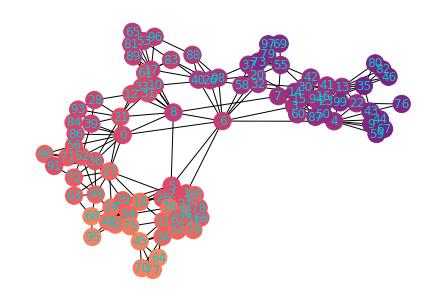

Polarisation (starting): 36.81881293215752
Bimodality (starting): -0.7512766868783446
Disagreement (starting - mean): 0.6324426432195049
Disagreement (starting - std): 0.6808483447844259
Entropy (starting - mean): nan
Entropy (starting - std): nan
Satisfaction (starting - mean): nan
Satisfaction (starting - std): nan
Satisfaction Weighted (starting - mean): nan
Satisfaction Weighted (starting - std): nan
Polarisation (no recommender): 8.277049853335193
Bimodality (no recommender): -0.5882666235382917
Disagreement (no recommender - mean): 0.275416239721442
Disagreement (no recommender - std): 0.3440778014851085
Entropy (no recommender - mean): nan
Entropy (no recommender - std): nan
Satisfaction (no recommender - mean): nan
Satisfaction (no recommender - std): nan
Satisfaction Weighted (no recommender - mean): nan
Satisfaction Weighted (no recommender - std): nan
Polarisation (random recommender): 3.3137095923353375
Bimodality (random recommender): 2.77401631064783
Disagreement (random 

In [12]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = G.copy()
random_G = G.copy()
normal_G = G.copy()
nudge_G = G.copy()
nudge_var_G = G.copy()
similar_G = G.copy()
unsimilar_G = G.copy()
random_param = {'n_post': 2}
normal_param = {'normal_mean': 0.5, 'normal_std': 0.1, 'n_post': 2}
nudge_param = {'nudge_goal': 0.5, 'n_post': 2}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.2}
print(f'Epoch\tRandom\tNormal\tNudge\tNudge Var')
for i in range(100):
  G = simulate_epoch_updated(G, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, 50, 50,
                                                strat_param=random_param)
  normal_G = simulate_epoch_content_recommender(normal_G, 50, 50, 
                                               strategy="normal", 
                                               strat_param=normal_param)
  nudge_G = simulate_epoch_content_recommender(nudge_G, 50, 50,
                                               strategy="nudge",
                                               strat_param=nudge_param)

  nudge_opt_G = simulate_epoch_content_recommender(nudge_var_G, 50, 50,
                                               strategy="nudge_opt",
                                               strat_param=nudge_param)
  similar_G = simulate_epoch_content_recommender(similar_G, 50, 50, 
                                                 strategy="similar", 
                                                 strat_param=similar_param)
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, 50, 50, 
                                                   strategy="unsimilar",
                                                   strat_param=unsimilar_param)
  #print(f'{i} \t {np.round(np.mean(list(feed_satisfaction(random_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(normal_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(nudge_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(nudge_var_G).values())), 3)}\t')
  

# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with normal content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(normal_G, 'opinion').values())
labels =  nx.get_node_attributes(normal_G, 'opinion')
print("Normal Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Normal Recommender Graph:")
nx.draw(normal_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge (optimized) content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_opt_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_opt_G, 'opinion')
print("Nudge Opt Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Opt Recommender Graph:")
nx.draw(nudge_opt_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with unsimilar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(unsimilar_G, 'opinion').values())
labels =  nx.get_node_attributes(unsimilar_G, 'opinion')
print("Unsimilar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Unsimilar Recommender Graph:")
nx.draw(unsimilar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

graphs = [starting_G, G, random_G, normal_G, nudge_G, nudge_opt_G, similar_G, unsimilar_G]
rec_text = ["starting", "no recommender", "random recommender", "normal recommender",
            "nudge recommender", "nudge opt recommender", "similar recommender", 
            "unsimilar recommender"]
for g, text in zip(graphs, rec_text):
  print(f"Polarisation ({text}): {polarisation(g)}")
  print(f"Bimodality ({text}): {sarle_bimodality(g)}")
  #print(f"Disagreement ({text}): {disagreement(g)}")
  print(f"Disagreement ({text} - mean): {np.mean(list(disagreement(g).values()))}")
  print(f"Disagreement ({text} - std): {np.std(list(disagreement(g).values()))}")
  #print(f"Entropy ({text}): {feed_entropy(g)}")
  print(f"Entropy ({text} - mean): {np.mean(list(feed_entropy(g).values()))}")
  print(f"Entropy ({text} - std): {np.std(list(feed_entropy(g).values()))}")
  #print(f"Satisfaction ({text}): {feed_satisfaction(g)}")
  print(f"Satisfaction ({text} - mean): {np.mean(list(feed_satisfaction(g).values()))}")
  print(f"Satisfaction ({text} - std): {np.std(list(feed_satisfaction(g).values()))}")
  #print(f"Satisfaction Weighted ({text}): {feed_satisfaction(g)}")
  print(f"Satisfaction Weighted ({text} - mean): {np.mean(list(feed_satisfaction_weight(g).values()))}")
  print(f"Satisfaction Weighted ({text} - std): {np.std(list(feed_satisfaction_weight(g).values()))}")
